# Data Exploration
This notebook explores the bike data and displays some plots, to find good ideas for expectations

In [3]:
import great_expectations as ge
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

metric column.standard_deviation.aggregate_fn is being registered with different metric_provider; overwriting metric_provider


In [4]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust width to avoid cutting off columns
pd.set_option('display.max_colwidth', None)  # Show full content in each column
pd.set_option('display.max_rows', None)  # Show all rows

In [5]:
# Load the dataset
df_spring_2011 = pd.read_csv("data/bike_rental_2011_Spring.csv")
df_summer_2011 = pd.read_csv("data/bike_rental_2011_Summer.csv")
df_fall_2011 = pd.read_csv("data/bike_rental_2011_Fall.csv")
df_winter_2011 = pd.read_csv("data/bike_rental_2011_Winter.csv")

df_spring_2012 = pd.read_csv("data/bike_rental_2012_Spring.csv")
df_summer_2012 = pd.read_csv("data/bike_rental_2012_Summer.csv")
df_fall_2012 = pd.read_csv("data/bike_rental_2012_Fall.csv")
df_winter_2012 = pd.read_csv("data/bike_rental_2012_Winter.csv")

df_year_2012 = pd.concat([df_spring_2012, df_summer_2012, df_fall_2012, df_winter_2012])

## First Set (Spring)

In [6]:
df_spring_2011.head()

,id,dteday,season,year,mnth,hour,holiday,weekday,workingday,weather,temp,felt_temp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,Spring,2011,1,0,0,Saturday,0,Good,3.28,3.0014,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,0,Saturday,0,Good,2.34,1.9982,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,0,Saturday,0,Good,2.34,1.9982,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,0,Saturday,0,Good,3.28,3.0014,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,0,Saturday,0,Good,3.28,3.0014,75.0,0.0,0,1,1


In [7]:
def plot_rentals_vs_time(df):
    """
    Plots total rentals against day and hour from a pandas DataFrame.

    Args:
        df (pd.DataFrame): DataFrame with 'dteday', 'hour', and 'total' columns.
    """

    # Ensure 'dteday' is a datetime object
    df['dteday'] = pd.to_datetime(df['dteday'])

    # Create a new datetime column combining date and hour
    df['datetime'] = df['dteday'] + pd.to_timedelta(df['hour'], unit='h')

    plt.figure(figsize=(15, 6))
    plt.plot(df['datetime'], df['total'], marker='.', linestyle='-', markersize=2)

    plt.title('Total Rentals vs. Day and Hour')
    plt.xlabel('Date and Hour')
    plt.ylabel('Total Rentals')
    plt.grid(True)

    # Format the x-axis to show dates and hours nicely
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7)) #Show one tick per week
    plt.gcf().autofmt_xdate()  # Rotate and align date labels nicely

    plt.tight_layout() #prevents labels overlapping
    plt.show()

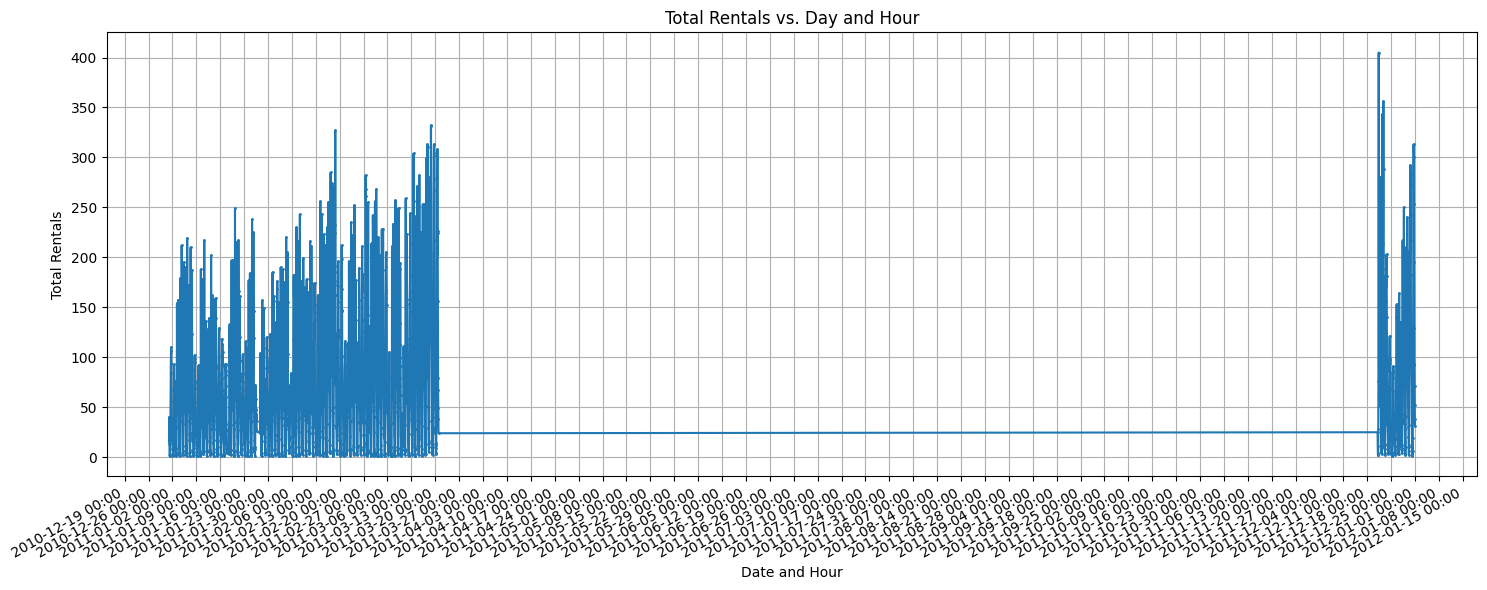

In [8]:
plot_rentals_vs_time(df_spring_2011)

In [9]:
def get_min_max_vals(df):
    print("Min Values")
    df.min()
    print("Max Values")
    df.max()

In [10]:
get_min_max_vals(df_spring_2011)

Min Values
Max Values
